In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import MinMaxScaler

In [124]:
# Load your time series data
data = pd.read_csv('Truck_sales.csv', usecols=[1])

# # Convert the 'Day-Month' column to datetime, assuming the year is missing and should be inferred
# data['date'] = pd.to_datetime(data['Day-Month'], format='%d-%b', errors='coerce')
# data['date'] = data['date'].apply(lambda x: x.replace(year=2023))  # Replace year with the current year or appropriate year

# # Set the 'date' column as the index
# data.set_index('date', inplace=True)

# Extract the target variable
y_orig = data['Number_Trucks_Sold']
y = y_orig[:-12]

# Scale the data
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()


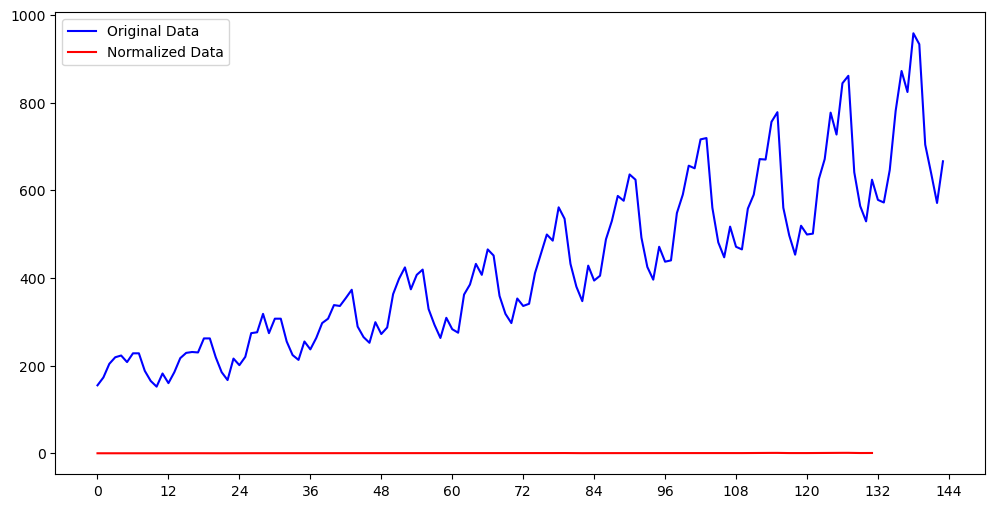

In [125]:
plt.figure(figsize=(12,6))
plt.plot(y_orig, label='Original Data', color='blue')
plt.plot(y_scaled, label='Normalized Data', color='red')
plt.xticks([0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144])
plt.legend()
plt.show()

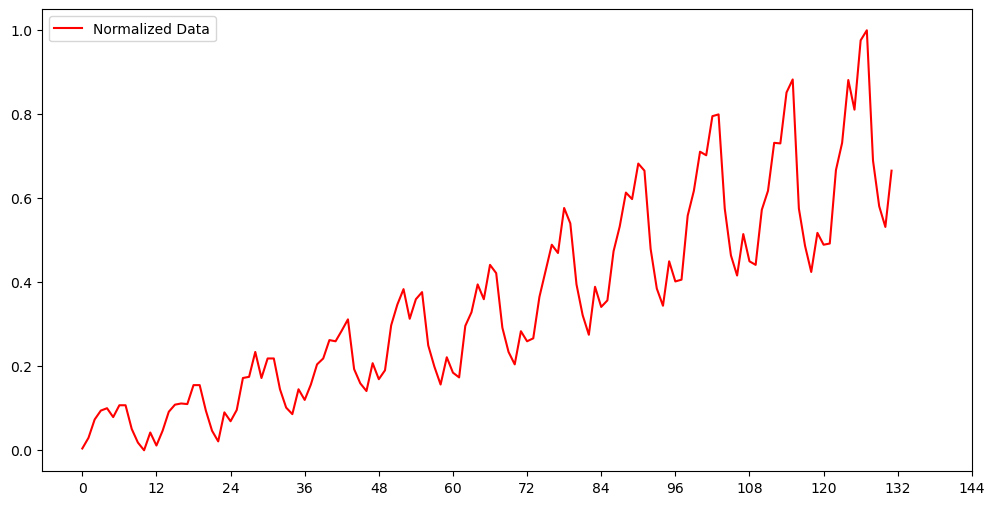

In [126]:
plt.figure(figsize=(12,6))
plt.plot(y_scaled, label='Normalized Data', color='red')
plt.xticks([0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144])
plt.legend()
plt.show()

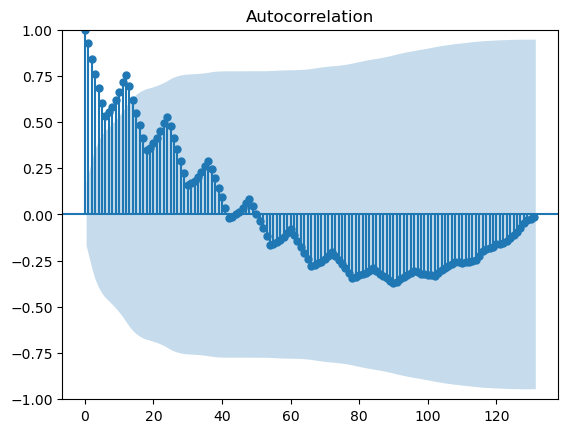

In [127]:
acf_plot = plot_acf(y_scaled, lags=131)

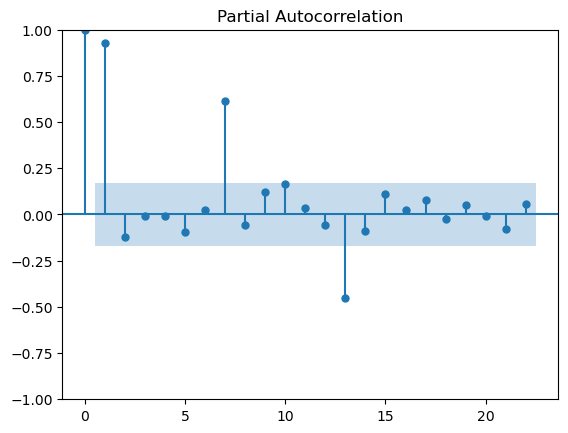

In [128]:
pacf_plot = plot_pacf(y_scaled)

c:\Users\jessi\anaconda3\envs\use_this_env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


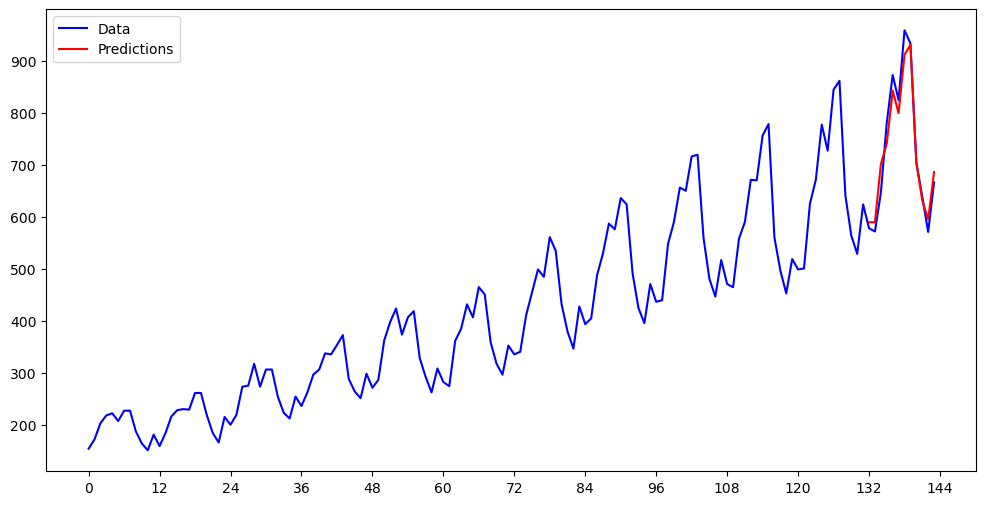

In [129]:
# Define the SARIMA model (adjust order and seasonal_order as needed)
order = (3, 1, 1)
seasonal_order = (1, 1, 1, 12)  # Example for monthly data with yearly seasonality

# Fit the SARIMA model
model = SARIMAX(y_scaled, order=order, seasonal_order=seasonal_order)
results = model.fit(disp=False)

# Generate predictions
start = len(y_scaled)
end = start + 11  # Forecasting the next 12 months
predictions_scaled = results.predict(start=start, end=end)

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

# Plot the predictions
plt.figure(figsize=(12,6))
plt.plot(y_orig, label='Data', color='blue')
plt.plot(range(132, 144), predictions, label='Predictions', color='red')
plt.xticks([0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144])
plt.legend()
plt.show()